<a href="https://colab.research.google.com/github/danielmlow/tutorials/blob/main/speech/spectrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!/usr/bin/env python3

'''
Authors: Daniel M. Low
License: Apache 2.0
'''

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime



# pd.options.display.width = 0
pd.set_option("display.max_columns", None)


In [ ]:
input_dir = './../../../data/blake_private/'
output_dir = './data/output/descriptive_stats/'

# Spectrogram

In [ ]:
path = input_dir+'audio/audio_samples/4f3ba6b9-3541-4a55-9cd9-efd2d31e650c_7719ee46-0170-44e2-af92-8115084b5a47_2202_3024_16khz.wav'

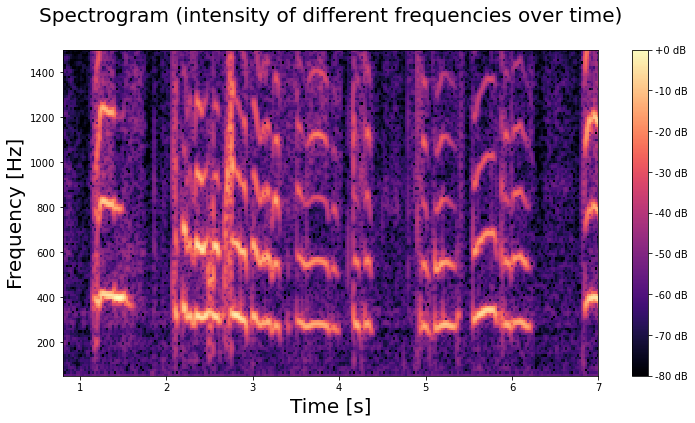

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display
y, sr = librosa.load(path, 
                    sr=16000)
D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

from matplotlib.pyplot import figure


# figure(figsize=(12,20), dpi=200)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
# ax.set(title='Spectrogram (intensity of different frequencies over time)', size=10)
fig.colorbar(img, ax=ax, format="%+2.f dB")

ax.set_ylim((50,1500))
ax.set_xlim((0.8,7))
n = 20
ax.set_ylabel('Frequency [Hz]', size=n)
ax.set_xlabel('Time [s]', size=n)
ax.set_title('Spectrogram (intensity of different frequencies over time)\n', size=n)
plt.show()
fig.savefig(output_dir+'spectrogram.png', dpi=300)


In [ ]:
!pip install -q praat-parselmouth


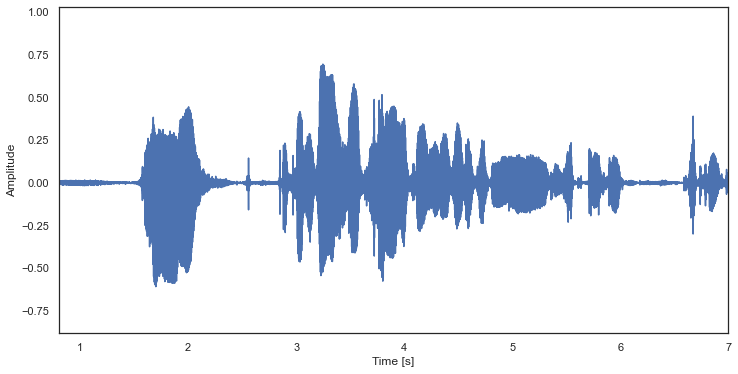

In [ ]:
import parselmouth

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
# plt.rcParams['axes.facecolor']='white'
sns.set() # Use seaborn's default style to make attractive graphs

sns.set_style("white")
# Plot nice figures using Python's "standard" matplotlib library
snd = parselmouth.Sound(path)
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(snd.xs(), snd.values.T)
plt.xlim([snd.xmin, snd.xmax])
plt.xlim([0.8, 7])
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.savefig(output_dir+'signal.png', dpi=300)
plt.show() # or plt.savefig("sound.png"), or plt.savefig("sound.pdf")

In [ ]:
output_dir

'./data/output/descriptive_stats/'

/Users/danielmlow/miniconda3/envs/blake/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


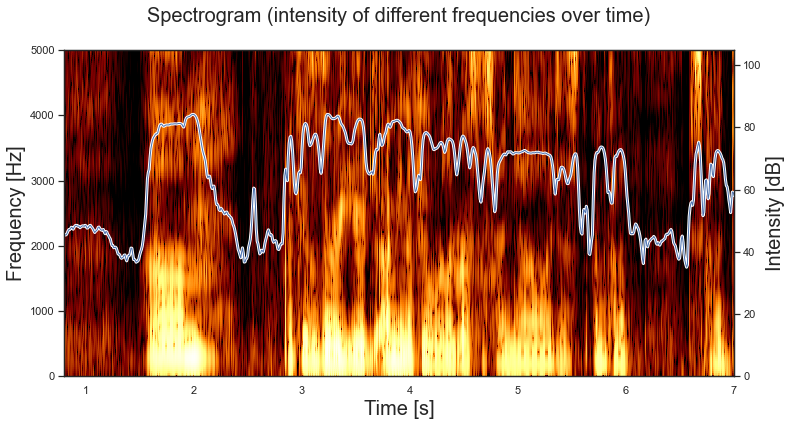

In [ ]:

def draw_spectrogram(spectrogram, dynamic_range=70, label_size=20):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, 
                   cmap='afmhot',
                    # cmap='gnuplot2'
                  )
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("Time [s]", size = label_size)
    plt.ylabel("Frequency [Hz]", size=label_size)

def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("Intensity [dB]", size = 20)

intensity = snd.to_intensity()
spectrogram = snd.to_spectrogram()
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_intensity(intensity)
# plt.xlim([snd.xmin, snd.xmax])
plt.xlim([0.8, 7])
# plt.savefig("spectrogram.pdf", dpi = 300)

plt.title('Spectrogram (intensity of different frequencies over time)\n', size=20)
# plt.show()
# plt.savefig(output_dir+'spectrogram_intensity.png', dpi=300)
plt.show() # or plt.savefig("spectrogram.pdf")